<a href="https://colab.research.google.com/github/spponns/Machine-Learning/blob/main/spam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from re import X
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from google.colab import files 
import io 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 




In [2]:
df=files.upload()

Saving spam.csv to spam.csv


In [3]:
df=pd.read_csv("/content/spam.csv",encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:

df.rename({"v1":"label","v2":"Text"},inplace=True,axis=1)
df.tail()

,label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   Text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   int64 
 1   Text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [33]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=ee73ed90456dbedc68d14a39bd58104f785812906797d735c87d1772cda9e151
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [38]:
from sentence_transformers import SentenceTransformer
transformer = SentenceTransformer("all-mpnet-base-v2")
embeddings = transformer.encode(df["Text"], show_progress_bar=True)
print(embeddings.shape)

Batches:   0%|          | 0/175 [00:00<?, ?it/s]

(5572, 768)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
df["target"] = binarizer.fit_transform(df["label"].values)
Y = df["target"].values
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.20, random_state = 0)

In [59]:
print("Before OverSampling, counts of label '1':{}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of lebel '0' :{} \n".format(sum(Y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res,Y_train_res = sm.fit_resample(X_train,Y_train.ravel())
print('After OverSampling, the shape of train_X: {}' .format(X_train_res.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(Y_train_res.shape))
print("After OverSampling, counts of label '1' :{}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0' :{}".format(sum(Y_train_res == 1)))



Before OverSampling, counts of label '1':581
Before OverSampling, counts of lebel '0' :3876 

After OverSampling, the shape of train_X: (7752, 7163)
After OverSampling, the shape of train_Y: (7752,) 

After OverSampling, counts of label '1' :3876
After OverSampling, counts of label '0' :3876


In [41]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [43]:
import re
corpus = []
length = len(df)

In [48]:
for i in range(0,length):
  text = re.sub("[^a-zA-Z0-9]"," ",df["Text"][i])
  text = text.lower()
  text = text.split()
  pe = PorterStemmer()
  stopword = stopwords.words("english")
  text = [pe.stem(word) for word in text if not word in set(stopword)]
  text = " ".join(text)
  corpus.append(text)

In [49]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [50]:

from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(max_features=35000)
X = CV.fit_transform(corpus).toarray()

In [52]:
import pickle
pickle.dump(CV, open('cv1.pk1', 'wb'))

In [53]:
df.describe()

,label,target
count,5572.000000,5572.000000
mean,0.134063,0.134063
std,0.340751,0.340751
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [54]:
df.shape

(5572, 6)

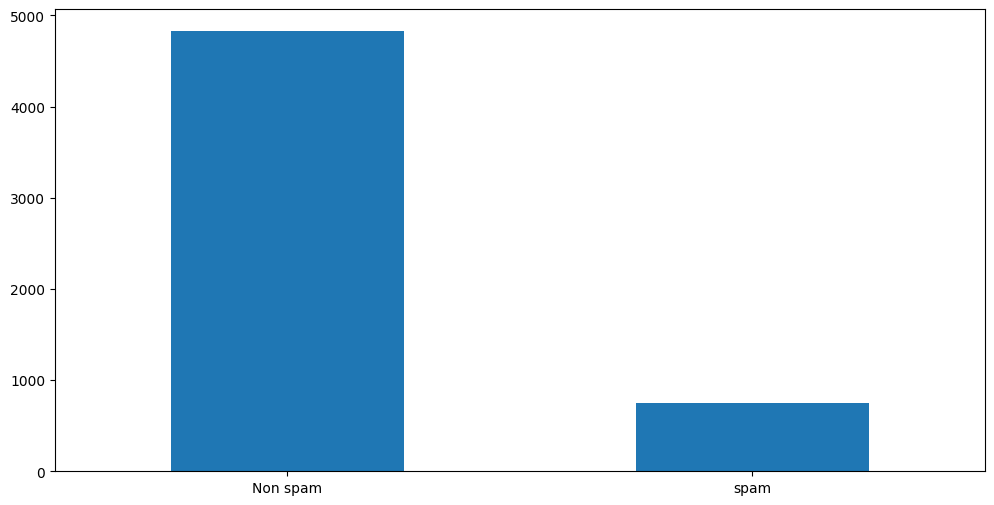

In [55]:
df["label"].value_counts().plot(kind="bar" ,figsize=(12,6))
plt.xticks(np.arange(2),('Non spam', 'spam'),rotation=0);

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.20,random_state =0)

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_res,Y_train_res)


DecisionTreeClassifier()

In [61]:
from sklearn.ensemble import RandomForestClassifier
model1 =RandomForestClassifier()
model1.fit(X_train_res, Y_train_res)

RandomForestClassifier()

In [62]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train_res,Y_train_res)




MultinomialNB()

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()

In [68]:
X_train.shape

(4457, 7163)

In [69]:
model.add(Dense(units =X_train_res.shape[1],activation="relu",kernel_initializer="random_uniform"))

In [70]:
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

In [71]:
model.add(Dense(units=100,activation="relu",kernel_initializer="random_uniform"))

In [72]:
model.add(Dense(units=1,activation="sigmoid"))

In [73]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [75]:
generator = model.fit(X_train_res,Y_train_res,epochs=10,steps_per_epoch=len(X_train_res)//64)

Epoch 1/10
121/121 [==============================] - 155s 1s/step - loss: 0.0192 - accuracy: 0.9954
Epoch 2/10
121/121 [==============================] - 157s 1s/step - loss: 0.0161 - accuracy: 0.9958
Epoch 3/10
121/121 [==============================] - 153s 1s/step - loss: 0.0137 - accuracy: 0.9969
Epoch 4/10
121/121 [==============================] - 145s 1s/step - loss: 0.0132 - accuracy: 0.9969
Epoch 5/10
121/121 [==============================] - 135s 1s/step - loss: 0.0140 - accuracy: 0.9972
Epoch 6/10
121/121 [==============================] - 139s 1s/step - loss: 0.0130 - accuracy: 0.9967
Epoch 7/10
121/121 [==============================] - 135s 1s/step - loss: 0.0128 - accuracy: 0.9973
Epoch 8/10
121/121 [==============================] - 147s 1s/step - loss: 0.0126 - accuracy: 0.9974
Epoch 9/10
121/121 [==============================] - 146s 1s/step - loss: 0.0119 - accuracy: 0.9974
Epoch 10/10
111/121 [==========================>...] - ETA: 11s - loss: 0.0126 - accuracy: 

121/121 [==============================] - 131s 1s/step - loss: 0.0126 - accuracy: 0.9973


In [76]:
y_pred=model.predict(X_test)
y_pred

35/35 [==============================] - 4s 110ms/step


array([[1.1590472e-15],
       [1.5099975e-04],
       [2.3910305e-20],
       ...,
       [3.1076846e-09],
       [1.2774731e-16],
       [4.8706554e-16]], dtype=float32)

In [77]:
y_pr = np.where(y_pred>0.5,1,0)

In [79]:
Y_test

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pr)
score = accuracy_score(Y_test,y_pr)
print(cm)
print('Accuracy score Is:-' ,score*100)

[[940   9]
 [ 18 148]]
Accuracy score Is:- 97.57847533632287


In [82]:
from hashlib import new
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ',new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps  = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  print(new_X_test)
  new_Y_pred = loaded_model.predict(new_X_test)
  print(new_Y_pred)
  new_X_pred = np.where(new_Y_pred>0.5,1,0)
  return new_Y_pred
  new_review = new_review(str(input("Enter new review...")))

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(Y_test, y_pr)
score = accuracy_score(Y_test,y_pr)
print(cm)
print('Accuracy score Is Naive Bayes:- '  ,score*100)

[[940   9]
 [ 18 148]]
Accuracy score Is Naive Bayes:-  97.57847533632287


In [90]:
cm = confusion_matrix(Y_test,y_pr)
score = accuracy_score(Y_test,y_pr)
print(cm)
print('Accuracy score Is:- ' ,score*100)



[[940   9]
 [ 18 148]]
Accuracy score Is:-  97.57847533632287


In [88]:
model.save('spam.h5')